In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import math

## EX 1. Plot the following equation $y = x^2 - x + 2$

In [2]:
x_series = [i for i in range(-20,21)]

In [3]:
x_series

[-20,
 -19,
 -18,
 -17,
 -16,
 -15,
 -14,
 -13,
 -12,
 -11,
 -10,
 -9,
 -8,
 -7,
 -6,
 -5,
 -4,
 -3,
 -2,
 -1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20]

In [4]:
y = x_series[0]**2 - x_series[0] + 2

In [5]:
y

422

In [6]:
y_series = [(x_series[i]**2 - x_series[i] + 2) for i in range(0,len(x_series))]

In [7]:
y_series

[422,
 382,
 344,
 308,
 274,
 242,
 212,
 184,
 158,
 134,
 112,
 92,
 74,
 58,
 44,
 32,
 22,
 14,
 8,
 4,
 2,
 2,
 4,
 8,
 14,
 22,
 32,
 44,
 58,
 74,
 92,
 112,
 134,
 158,
 184,
 212,
 242,
 274,
 308,
 344,
 382]

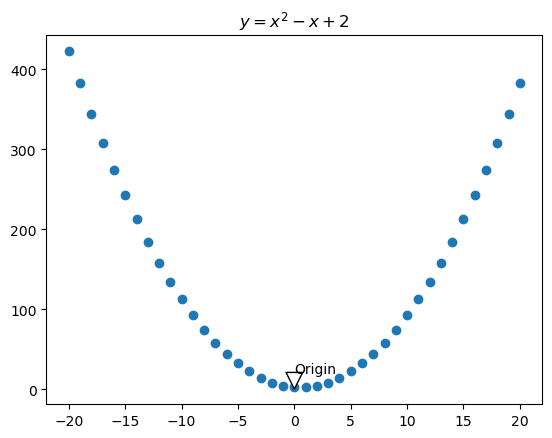

In [8]:
plt.scatter(x_series,y_series)
plt.title('$y = x^2 - x + 2$')
plt.annotate('Origin', xy=(0, 0), xytext=(0, 20),
             arrowprops={'facecolor': 'white'})
plt.show()

## EX 2. Plot the following equations:   <br><br>$y = x^1/2$ <br> $y = x^3$ <br> $y = 2^x$ <br> $y = 1/(x+1)$